In [1]:
#import numpy as np
from scipy.optimize import minimize
import math
from random import *
import matplotlib.pyplot as plt
from matplotlib import colors
import numpy as np

In [41]:
def objective(z):
    p = 0
    #real students to fake students/boundary
    r = 4
    fakeStudents = 0
    fstudents = []
    for i in range(0,class_x-chair_l+1,2):
        fstudents.append(i)
        fstudents.append(-r)
        #fstudents.append(3*math.pi/4)
        fstudents.append(i)
        fstudents.append(class_y-chair_l+r)
        #fstudents.append(7*math.pi/4)
        fakeStudents = fakeStudents + 2
    for i in range(0,class_y-chair_l+1,2):
        fstudents.append(-r)
        fstudents.append(i)
        #fstudents.append(5*math.pi/4)
        fstudents.append(class_x-chair_l+r)
        fstudents.append(i)
        #fstudents.append(math.pi/4)
        fakeStudents = fakeStudents + 2
    for i in range(1,r):
        fstudents.append(class_x-chair_l+i)
        fstudents.append(-r+i)
        #fstudents.append(math.pi/2)
        fstudents.append(class_x-chair_l+r-i)
        fstudents.append(class_y-chair_l+i)
        #fstudents.append(2*math.pi)
        fstudents.append(-i)
        fstudents.append(class_y-chair_l+r-i)
        #fstudents.append(3*math.pi/2)
        fstudents.append(-r+i)
        fstudents.append(-i)
        #fstudents.append(math.pi)
        fakeStudents = fakeStudents + 4
        
    #start p computations
    for i in range(int(len(z)/3)):
        #real to fake students
        for j in range(int(len(fstudents)/2)):
            x1 = z[i*3]
            y1 = z[i*3+1]
            d1 = z[i*3+2]
            x2 = fstudents[j*2]
            y2 = fstudents[j*2+1]
            
            x = (x2-x1)*math.cos(d1)-(y2-y1)*math.sin(d1)
            y = (x2-x1)*math.sin(d1)+(y2-y1)*math.cos(d1)

            p = p + 8*2**(-.4*(x**2+y**2)) +5*2**(-.15*((x-2)**2+(y-2)**2))
            p = p + 3*2**(-.1*((x-5)**2+(y-5)**2))
            
        #real to real students    
        for j in range(int(len(z)/3)):
            if i != j:
                #equation
                x1 = z[i*3]
                y1 = z[i*3+1]
                d1 = z[i*3+2] 
                x2 = z[j*3]
                y2 = z[j*3+1]
                #depends on angle of first student
                
                x = (x2-x1)*math.cos(d1)-(y2-y1)*math.sin(d1)
                y = (x2-x1)*math.sin(d1)+(y2-y1)*math.cos(d1)
                
                p = p + 8*2**(-.4*(x**2+y**2)) +5*2**(-.15*((x-2)**2+(y-2)**2))
                p = p + 3*2**(-.1*((x-5)**2+(y-5)**2))
    return p

def roundAngle(num):
    n = (num-math.pi/4)/(2*math.pi)
    n = n*8
    n = round(n)%8
    n = int(n*45)
    return n

In [42]:
students = 20
class_y = 30
class_x = 20
chair_l = 2 #make sure 0 index is smaller than 1 index
#set input
table_long = 6
table_short = 2
table_num = 5
table = [int(table_short),int(table_long)]

In [43]:
#actual bounds
bnds = ()
x_bnd = (0,class_x-2)
y_bnd = (0,class_y-2)
d_bnd = (0,4*math.pi)
for i in range(students):
    bnds = bnds + (x_bnd,y_bnd,d_bnd)

#creating fake bound of students
r = 5
fakeStudents = 0
'''
r = 4
for i in range(0,class_x-chair_l+1,2):
    x_bnd = (i,i+.01)
    y_bnd = (-r,-r+.01)
    d_bnd = (3*math.pi/4,3*math.pi/4+.01)
    bnds = bnds + (x_bnd,y_bnd,d_bnd)
    x_bnd = (i,i+.01)
    y_bnd = (class_y-chair_l+r,class_y-chair_l+r+.01)
    d_bnd = (7*math.pi/4,7*math.pi/4+.01)
    bnds = bnds + (x_bnd,y_bnd,d_bnd)
    fakeStudents = fakeStudents + 2
for i in range(0,class_y-chair_l+1,2):
    x_bnd = (-r,-r+.01)
    y_bnd = (i,i+.01)
    d_bnd = (5*math.pi/4,5*math.pi/4+.01)
    bnds = bnds + (x_bnd,y_bnd,d_bnd)
    x_bnd = (class_x-chair_l+r,class_x-chair_l+r+.01)
    y_bnd = (i,i+.01)
    d_bnd = (math.pi/4,math.pi/4+.01)
    bnds = bnds + (x_bnd,y_bnd,d_bnd)
    fakeStudents = fakeStudents + 2
for i in range(1,r):
    x_bnd = (class_x-chair_l+i,class_x-chair_l+i+.01)
    y_bnd = (-r+i,-r+i+.01)
    d_bnd = (math.pi/2,math.pi/2+.01)
    bnds = bnds + (x_bnd,y_bnd,d_bnd)
    x_bnd = (class_x-chair_l+r-i,class_x-chair_l+r-i+.01)
    y_bnd = (class_y-chair_l+i,class_y-chair_l+i+.01)
    d_bnd = (2*math.pi,2*math.pi+.01)
    bnds = bnds + (x_bnd,y_bnd,d_bnd)
    x_bnd = (-i,-i+.01)
    y_bnd = (class_y-chair_l+r-i,class_y-chair_l+r-i+.01)
    d_bnd = (3*math.pi/2,3*math.pi/2+.01)
    bnds = bnds + (x_bnd,y_bnd,d_bnd)
    x_bnd = (-r+i,-r+i+.01)
    y_bnd = (-i,-i+.01)
    d_bnd = (math.pi,math.pi+.01)
    bnds = bnds + (x_bnd,y_bnd,d_bnd)
    fakeStudents = fakeStudents + 4
    '''
#guess
guess = []
for i in range(students+fakeStudents):
    guess.append(random()*class_x)
    guess.append(random()*class_y)
    guess.append(2*math.pi)
print(objective(guess))

#con1 = {'type': 'ineq','fun': constraint1}
cons = []

352.81924122909805


In [5]:
sol = minimize(objective,guess,method='SLSQP',\
                bounds=bnds,constraints=cons)

In [6]:
print(sol)

     fun: 694.2257856585209
     jac: array([ 3.11279297e-03,  1.61743164e-03, -4.80651855e-03, -5.03540039e-04,
       -1.61743164e-03, -1.22070312e-03,  4.73022461e-04, -2.89916992e-04,
        7.32421875e-04, -1.26647949e-03, -1.00708008e-03,  1.87683105e-03,
       -5.49316406e-04,  9.00268555e-04, -3.43322754e-03, -1.89208984e-03,
       -1.09863281e-03,  4.88281250e-04, -4.57763672e-05, -1.52587891e-04,
        4.68444824e-03,  3.35693359e-04,  1.08337402e-03, -3.95202637e-03,
       -5.79833984e-04, -7.62939453e-04, -7.76672363e-03,  1.98364258e-04,
        2.01416016e-03,  3.55529785e-03, -1.59270477e+00,  7.97150421e+00,
       -1.99652100e+00, -1.59124756e+00, -8.00865173e+00,  2.08032227e+00,
       -1.39705658e+00,  1.01647949e+00, -1.89468384e-01, -1.41551208e+00,
       -1.01853943e+00,  2.92953491e-01,  2.28881836e-04,  1.10588074e-01,
        4.98046875e-02, -1.26037598e-02, -9.14459229e-02, -1.12915039e-03,
        3.50952148e-03,  7.17544556e-02,  7.70568848e-03,  2.4

In [7]:
for i in range(int(len(sol.x)/3)):
    print(sol.x[i*3:(i+1)*3], end = " ")
    print(roundAngle(sol.x[i*3+2]))

[16.52825985 23.74496189  3.3483597 ] 135
[ 1.09327042 11.92850558  7.24295009] 0
[1.48255596 4.32719296 0.21409453] 315
[ 2.25603897 25.431803    7.81776483] 45
[15.73764498  2.57434947  4.67717204] 225
[10.07348566 27.25605442  8.79329062] 90
[ 1.00454658 17.59008877  6.94798647] 0
[16.91938933 16.1041366   4.10283976] 180
[7.89029827 0.75507173 5.65810281] 270
[17.00100892 10.44432277  3.80338352] 180
[ 0.01       -4.          2.36619449] 90
[1.00000000e-02 3.20100000e+01 5.49778714e+00] 270
[ 2.01       -4.          2.36619449] 90
[ 2.01       32.01        5.49778714] 270
[ 4.00997592 -4.          2.35619449] 90
[ 4.01       32.01        5.50237632] 270
[ 6.00507087 -4.          2.35619449] 90
[ 6.00739988 32.01        5.49857591] 270
[ 8.00491844 -4.          2.35619449] 90
[ 8.00532823 32.01        5.49778714] 270
[10.00455029 -4.          2.35619449] 90
[10.00495036 32.01        5.49778714] 270
[12.0026885  -4.          2.35670466] 90
[12.00512576 32.01        5.49778714] 270
[1

In [19]:
#functions
def addTable():
    #find highest position number in table_placeent_ns
    max_ns = 0
    for i in range(class_y-(table[1]-1)):
        for j in range(class_x-(table[0]-1)):
            if table_placement_ns[i][j] > max_ns:
                max_ns = table_placement_ns[i][j]
    #find highest position number in table_placeent_ew
    max_ew = 0
    for i in range(class_y-(table[0]-1)):
        for j in range(class_x-(table[1]-1)):
            if table_placement_ew[i][j] > max_ew:
                max_ew = table_placement_ew[i][j]
    
    #compare the highest position number in ns and ew
    if (max_ns >= max_ew):
        t = table_placement_ns
        table_x = table[0]
        table_y = table[1]
        m = max_ns
        ns_table = 1
    else:
        t = table_placement_ew
        table_x = table[1]
        table_y = table[0]
        m = max_ew
        ns_table = 0
    
    #count how many available positions there are for the specific table orientation
    available = sum(x.count(m) for x in t)
    #rng for which position
    num = math.ceil(random()*available)
    #put at that position
    for i in range(class_y-(table_y-1)):
        for j in range(class_x-(table_x-1)):
            if t[i][j] == m:
                num -= 1
            if num == 0:
                x = j
                y = i
                break
        if num == 0:
            break
            
    #update classroom
    for i in range(y, y+table_y):
        for j in range(x,x+table_x):
            classroom[i][j] = 1
    
    #update table_placement_ns
    for i in range(y-(table[1]-1), y+table[ns_table]):
        for j in range(x-(table[0]-1), x+table[1-ns_table]):
            if i >= 0 and i < class_y and j >= 0 and j < class_x:
                table_placement_ns[i][j] = 0
    
    #update table_placement_ew
    for i in range(y-(table[0]-1), y+table[ns_table]):
        for j in range(x-(table[1]-1), x+table[1-ns_table]):
            if i >= 0 and i < class_y and j >= 0 and j < class_x:
                table_placement_ew[i][j] = 0
    
    #add table
    tables.append([x, y, ns_table])

In [20]:
def addChair(x,y,d):
    available = sum(x1.count(1) for x1 in chair_placement)
    if available <= 0:
        return -1
    
    #update classroom
    #print(chair_l)
    for i in range(y, y+chair_l):
        for j in range(x,x+chair_l):
            classroom[i][j] = 2
            
    #update table_placement_ns
    for i in range(y-table[1], y+chair_l+1):
        for j in range(x-table[0], x+chair_l+1):
            if i >= 0 and i < class_y and j >= 0 and j < class_x and table_placement_ns[i][j]!=0:
                if i >= y-(table[1]-1) and i < y+chair_l and j >= x-(table[0]-1) and j < x+chair_l:
                    table_placement_ns[i][j] = 0
                else:
                    if j == x+chair_l and i > y-table[1] and i < y+chair_l and(d>=315 or d<=45):
                        table_placement_ns[i][j] = table_placement_ns[i][j] + 1
                    if i == y-table[1] and j > x-table[0] and j < x+chair_l and d>=45 and d<=135:
                        table_placement_ns[i][j] = table_placement_ns[i][j] + 1
                    if j == x-table[0] and i > y-table[1] and i < y+chair_l and d>=135 and d<=225:
                        table_placement_ns[i][j] = table_placement_ns[i][j] + 1
                    if i == y+chair_l and j > x-table[0] and j < x+chair_l and d>=225 and d<=315:
                        table_placement_ns[i][j] = table_placement_ns[i][j] + 1
                    
    #update table_placement_ew
    for i in range(y-table[0], y+chair_l+1):
        for j in range(x-table[1], x+chair_l+1):
            if i >= 0 and i < class_y and j >= 0 and j < class_x and table_placement_ew[i][j]!=0:
                if  i >= y-(table[0]-1) and i < y+chair_l and j >= x-(table[1]-1) and j < x+chair_l:
                    table_placement_ew[i][j] = 0
                else:
                    if j == x+chair_l and i > y-table[0] and i < y+chair_l and(d>=315 or d<=45):
                        table_placement_ew[i][j] = table_placement_ew[i][j] + 1
                    if i == y-table[0] and j > x-table[1] and j < x+chair_l and d>=45 and d<=135:
                        table_placement_ew[i][j] = table_placement_ew[i][j] + 1
                    if j == x-table[1] and i > y-table[0] and i < y+chair_l and d>=135 and d<=225:
                        table_placement_ew[i][j] = table_placement_ew[i][j] + 1
                    if i == y+chair_l and j > x-table[1] and j < x+chair_l and d>=225 and d<=315:
                        table_placement_ew[i][j] = table_placement_ew[i][j] + 1
    
    #change this
    #update chair_placement
    for i in range(class_y):
        for j in range(class_x):
            if math.sqrt((i-y)**2 + (j-x)**2) < 6:
                chair_placement[i][j] = 0
    
    #add chair
    chairs.append([x,y,d])

In [21]:
#set up arrays
tables = []
chairs = []
classroom = [[0 for i in range(class_x)] for j in range(class_y)]
chair_placement = [[1 for i in range(class_x)] for j in range(class_y)]
#hard code for seat length = 2
for i in range(class_y):
    chair_placement[i][class_x-1] = 0       
for j in range(class_x):
    chair_placement[class_y-1][j] = 0  
table_placement_ns = [[1 for i in range(class_x)] for j in range(class_y)]
table_placement_ew = [[1 for i in range(class_x)] for j in range(class_y)]
for i in range(class_y):
    for j in range(class_x):
        if j >= class_x-(table_long-1) or i >= class_y-(table_short-1):
            table_placement_ew[i][j] = 0
for i in range(class_y):
    for j in range(class_x):
        if j >= class_x-(table_short-1) or i >= class_y-(table_long-1):
            table_placement_ns[i][j] = 0
            
#adding tables and chairs        
for i in range(students):
    if (addChair(int(round(sol.x[i*3])),int(round(sol.x[i*3+1])),roundAngle(sol.x[i*3+2])) == -1):
        print("Not enough space!")
        
for i in range(table_num):
    if (addTable() == -1):
        print("Not enough space!")

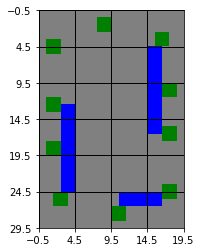

[17, 24, 135]
[1, 12, 0]
[1, 4, 315]
[2, 25, 45]
[16, 3, 225]
[10, 27, 90]
[1, 18, 0]
[17, 16, 180]
[8, 1, 270]
[17, 10, 180]


In [22]:
# create discrete colormap
cmap = colors.ListedColormap(['grey','blue','green'])
bounds = [0,1,2,3]
norm = colors.BoundaryNorm(bounds, cmap.N)

fig, ax = plt.subplots()
ax.imshow(classroom, cmap=cmap, norm=norm)

# draw gridlines
ax.grid(which='major', axis='both', linestyle='-', color='k', linewidth=1)
ax.set_xticks(np.arange(-.5, class_x, 5))
ax.set_yticks(np.arange(-.5, class_y, 5))

plt.show()
for chair in chairs:
    print(chair)